--- HASIL PERHITUNGAN TEKS (Kasus: RPM=3000, Load=50) ---

LAYER 1 - Fuzzifikasi (Nilai mu):
  mu_RPM_Low    : 0.135335
  mu_RPM_High   : 0.000000
  mu_Load_Light : 0.135335
  mu_Load_Heavy : 0.135335

LAYER 2 - Firing Strength (w):
  w1 (R1): 0.018316
  w2 (R2): 0.018316
  w3 (R3): 0.000000
  w4 (R4): 0.000000

LAYER 3 - Normalisasi (w_bar):
  w1_bar: 0.500000
  w2_bar: 0.500000
  w3_bar: 0.000000
  w4_bar: 0.000000

LAYER 4 - Sugeno Output (f) & Weighted Output:
  R1: f=95.0 -> w_bar*f = 47.5000
  R2: f=72.0 -> w_bar*f = 36.0000
  R3: f=121.0 -> w_bar*f = 0.0000
  R4: f=90.0 -> w_bar*f = 0.0000

HASIL PREDIKSI TEMPERATUR: 83.5000

--- MENAMPILKAN GRAFIK ---


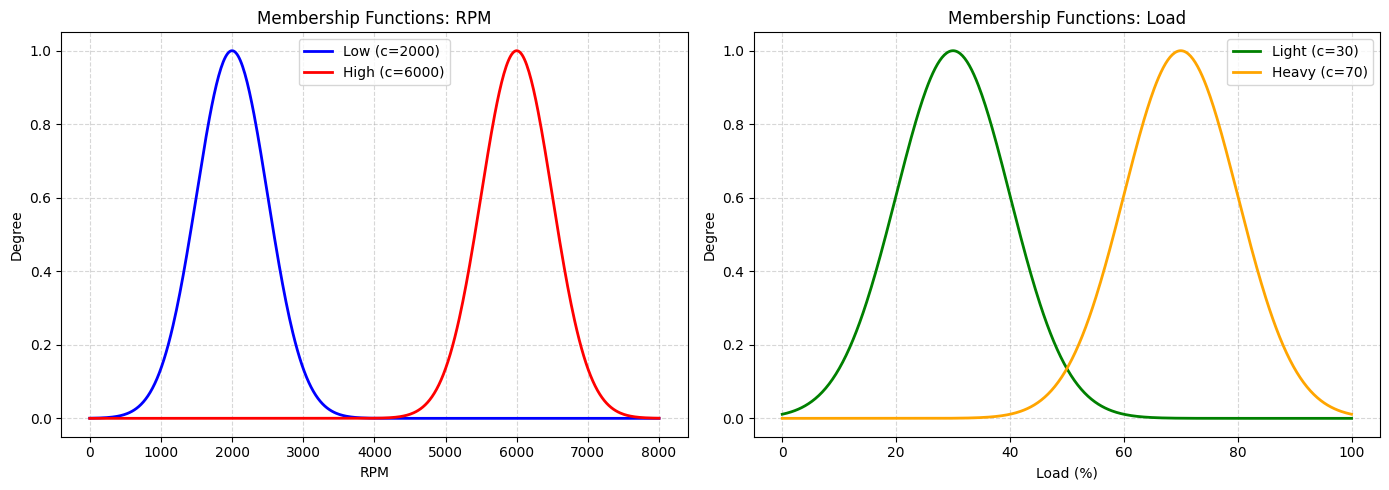

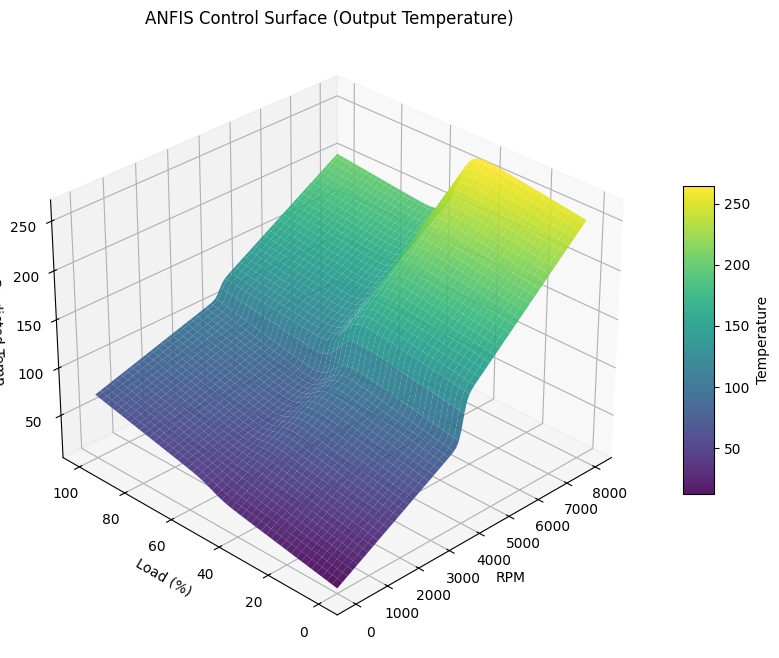

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ==========================================
# 1. DEFINISI FUNGSI ANFIS
# ==========================================

def gaussian_mf(x, c, sigma):
    """Fungsi Keanggotaan Gaussian"""
    return np.exp(-((x - c)**2) / (2 * sigma**2))

def sugeno_func(rpm, load, p, q, r):
    """Fungsi Output Sugeno Orde 1"""
    return p * rpm + q * load + r

# ==========================================
# 2. SETUP PARAMETER (SESUAI PDF)
# ==========================================

# Parameter MF (Gaussian)
rpm_low_params  = {'c': 2000, 'sigma': 500}
rpm_high_params = {'c': 6000, 'sigma': 500}
load_light_params = {'c': 30, 'sigma': 10}
load_heavy_params = {'c': 70, 'sigma': 10}

# Parameter Rule Sugeno (p, q, r)
rule1_pqr = [0.02, 0.5, 10]
rule2_pqr = [0.01, 0.6, 12]
rule3_pqr = [0.03, 0.4, 11]
rule4_pqr = [0.02, 0.3, 15]

# ==========================================
# 3. BAGIAN 1: TEXT OUTPUT (PERHITUNGAN MANUAL)
# ==========================================

# Input Variabel (Studi Kasus)
input_rpm = 3000
input_load = 50

print(f"--- HASIL PERHITUNGAN TEKS (Kasus: RPM={input_rpm}, Load={input_load}) ---")

# Layer 1: Fuzzifikasi
mu_rpm_low   = gaussian_mf(input_rpm, **rpm_low_params)
mu_rpm_high  = gaussian_mf(input_rpm, **rpm_high_params)
mu_load_light = gaussian_mf(input_load, **load_light_params)
mu_load_heavy = gaussian_mf(input_load, **load_heavy_params)

print("\nLAYER 1 - Fuzzifikasi (Nilai mu):")
print(f"  mu_RPM_Low    : {mu_rpm_low:.6f}")
print(f"  mu_RPM_High   : {mu_rpm_high:.6f}")
print(f"  mu_Load_Light : {mu_load_light:.6f}")
print(f"  mu_Load_Heavy : {mu_load_heavy:.6f}")

# Layer 2: Firing Strength
w1 = mu_rpm_low  * mu_load_light
w2 = mu_rpm_low  * mu_load_heavy
w3 = mu_rpm_high * mu_load_light
w4 = mu_rpm_high * mu_load_heavy

print("\nLAYER 2 - Firing Strength (w):")
print(f"  w1 (R1): {w1:.6f}")
print(f"  w2 (R2): {w2:.6f}")
print(f"  w3 (R3): {w3:.6f}")
print(f"  w4 (R4): {w4:.6f}")

# Layer 3: Normalisasi
w_total = w1 + w2 + w3 + w4
# Mencegah pembagian dengan nol jika semua w=0
if w_total == 0: w_total = 1e-10

w1_bar = w1 / w_total
w2_bar = w2 / w_total
w3_bar = w3 / w_total
w4_bar = w4 / w_total

print("\nLAYER 3 - Normalisasi (w_bar):")
print(f"  w1_bar: {w1_bar:.6f}")
print(f"  w2_bar: {w2_bar:.6f}")
print(f"  w3_bar: {w3_bar:.6f}")
print(f"  w4_bar: {w4_bar:.6f}")

# Layer 4: Konsekuen (Sugeno Output)
f1 = sugeno_func(input_rpm, input_load, *rule1_pqr)
f2 = sugeno_func(input_rpm, input_load, *rule2_pqr)
f3 = sugeno_func(input_rpm, input_load, *rule3_pqr)
f4 = sugeno_func(input_rpm, input_load, *rule4_pqr)

wf1 = w1_bar * f1
wf2 = w2_bar * f2
wf3 = w3_bar * f3
wf4 = w4_bar * f4

print("\nLAYER 4 - Sugeno Output (f) & Weighted Output:")
print(f"  R1: f={f1:.1f} -> w_bar*f = {wf1:.4f}")
print(f"  R2: f={f2:.1f} -> w_bar*f = {wf2:.4f}")
print(f"  R3: f={f3:.1f} -> w_bar*f = {wf3:.4f}")
print(f"  R4: f={f4:.1f} -> w_bar*f = {wf4:.4f}")

# Layer 5: Output Akhir
anfis_output = wf1 + wf2 + wf3 + wf4

print("\n========================================")
print(f"HASIL PREDIKSI TEMPERATUR: {anfis_output:.4f}")
print("========================================\n")

# ==========================================
# 4. BAGIAN 2: GRAFIK / CHART OUTPUT
# ==========================================

print("--- MENAMPILKAN GRAFIK ---")

# --- A. Grafik Membership Function ---
rpm_range = np.linspace(0, 8000, 500)
load_range = np.linspace(0, 100, 500)

plt.figure(figsize=(14, 5))

# Plot RPM
plt.subplot(1, 2, 1)
plt.plot(rpm_range, gaussian_mf(rpm_range, **rpm_low_params), label='Low (c=2000)', color='blue', linewidth=2)
plt.plot(rpm_range, gaussian_mf(rpm_range, **rpm_high_params), label='High (c=6000)', color='red', linewidth=2)
plt.title('Membership Functions: RPM')
plt.xlabel('RPM')
plt.ylabel('Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Plot Load
plt.subplot(1, 2, 2)
plt.plot(load_range, gaussian_mf(load_range, **load_light_params), label='Light (c=30)', color='green', linewidth=2)
plt.plot(load_range, gaussian_mf(load_range, **load_heavy_params), label='Heavy (c=70)', color='orange', linewidth=2)
plt.title('Membership Functions: Load')
plt.xlabel('Load (%)')
plt.ylabel('Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# --- B. Grafik 3D Surface ---
# Fungsi wrapper untuk perhitungan array (vectorized)
def hitung_anfis_vectorized(rpm_vals, load_vals):
    mu_rpm_l = gaussian_mf(rpm_vals, **rpm_low_params)
    mu_rpm_h = gaussian_mf(rpm_vals, **rpm_high_params)
    mu_load_l = gaussian_mf(load_vals, **load_light_params)
    mu_load_h = gaussian_mf(load_vals, **load_heavy_params)

    w1 = mu_rpm_l * mu_load_l
    w2 = mu_rpm_l * mu_load_h
    w3 = mu_rpm_h * mu_load_l
    w4 = mu_rpm_h * mu_load_h

    w_sum = np.maximum(w1 + w2 + w3 + w4, 1e-10)
    w1_b, w2_b, w3_b, w4_b = w1/w_sum, w2/w_sum, w3/w_sum, w4/w_sum

    f1 = sugeno_func(rpm_vals, load_vals, *rule1_pqr)
    f2 = sugeno_func(rpm_vals, load_vals, *rule2_pqr)
    f3 = sugeno_func(rpm_vals, load_vals, *rule3_pqr)
    f4 = sugeno_func(rpm_vals, load_vals, *rule4_pqr)

    return (w1_b * f1) + (w2_b * f2) + (w3_b * f3) + (w4_b * f4)

# Membuat Grid Data
rpm_grid = np.linspace(0, 8000, 100)
load_grid = np.linspace(0, 100, 100)
X, Y = np.meshgrid(rpm_grid, load_grid)
Z = hitung_anfis_vectorized(X, Y)

# Plotting 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_title('ANFIS Control Surface (Output Temperature)')
ax.set_xlabel('RPM')
ax.set_ylabel('Load (%)')
ax.set_zlabel('Predicted Temp')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Temperature')
ax.view_init(elev=30, azim=225)
plt.show()